# NBA Shooting Data
This dataset is based on shooting statistics that can be found on [NBA.com](https://www.nba.com/stats/players/shooting/?Season=2020-21&SeasonType=Playoffs&PerMode=Totals). It consists of shots taken by four different players during the 2021 NBA Playoffs.

In [32]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly
import numpy as np

df = pd.read_csv('nba_players_shooting.csv', index_col=0)
print(df)

          SHOOTER          X          Y     RANGE           DEFENDER   SCORE
INDEX                                                                       
0      Seth Curry  -3.808987   5.583621    (0, 4)         Chris Paul    MADE
1      Seth Curry  -0.104279   5.919138    (0, 4)         Trae Young    MADE
2      Seth Curry  -0.525864   8.912239    (0, 4)         Trae Young    MADE
3      Seth Curry  -0.790616   7.503782    (0, 4)         Chris Paul    MADE
4      Seth Curry   2.119074   5.320534    (0, 4)         Trae Young    MADE
...           ...        ...        ...       ...                ...     ...
771    Trae Young  23.952742  15.324875  (25, 29)  Russell Westbrook  MISSED
772    Trae Young   6.221766  30.756008  (25, 29)         Seth Curry  MISSED
773    Trae Young  16.397467  27.660323  (25, 29)         Chris Paul  MISSED
774    Trae Young -11.257104  30.713097  (25, 29)  Russell Westbrook  MISSED
775    Trae Young -11.289371  31.064197  (25, 29)         Chris Paul  MISSED

#### Data Dictionary

|variable |class     |description                                                  |
|:--------|:---------|:------------------------------------------------------------|
|SHOOTER  |String    |Name of the player taking the shot                           |
|X        |float     |Horizontal distance of the shot taken from the baseline in ft  |
|Y        |float     |Vertical distance of the shot taken from the baseline in ft    |
|RANGE    |String    |Radius range of the shot taken from the baseline in ft         |
|DEFENDER |String    |Name of the player defending the shot                        |
|SCORE    |String    |'MADE' if shot is scored, else 'MISSED'                      |

# Shots taken during the NBA 2021 Playoffs:

In [18]:
# Create the base scatter plot with all shots taken
fig1 = px.scatter(df, x='X', y='Y', color='SHOOTER', title='All Shots Taken by Selected Players')

# Update layout to match the court dimensions
fig1.update_layout(
    xaxis_title='Horizontal Distance from Rim',
    yaxis_title='Vertical Distance from Rim',
    width=800,
    height=600,
    xaxis=dict(range=[-30, 30], showgrid=False, zeroline=False, title_standoff=30),
    yaxis=dict(range=[0, 40], showgrid=False, zeroline=False),
    plot_bgcolor='white',
    shapes=[
        dict(type="circle", xref="x", yref="y", x0=-0.75, y0=4.5, x1=0.75, y1=6, line=dict(color="orange")),  # Hoop
        dict(type="line", xref="x", yref="y", x0=-3, y0=4.3, x1=3, y1=4.3, line=dict(color="black", width=3)),  # Backboard
        dict(type="rect", xref="x", yref="y", x0=-8, y0=0, x1=8, y1=19, line=dict(color="black")),  # Paint (key)
        dict(type="circle", xref="x", yref="y", x0=-6, y0=13, x1=6, y1=25, line=dict(color="black")),  # Free throw circle
        dict(type="path", path="M -4 5.25 A 4 4 0 0 1 4 5.25", line=dict(color="black")),  # Restricted area arc
        dict(type="path", xref="x", yref="y", path="M -22 5.25 A 23.75 23.75 0 0 1 22 5.25", line=dict(color="black", width=2)),  # 3PT arc
        dict(type="line", x0=-22, y0=0, x1=-22, y1=14, line=dict(color="black")),  # Left corner 3 line
        dict(type="line", x0=22, y0=0, x1=22, y1=14, line=dict(color="black"))  # Right corner 3 line
    ]
)

# Lock aspect ratio so circles don’t become ovals
fig1.update_yaxes(scaleanchor="x", scaleratio=1)

# Add 3-point arc
theta = np.linspace(0, np.pi, 200)
radius = 22
x_arc = radius * np.cos(theta)
y_arc = (radius * 0.7) * np.sin(theta) + 14 

fig1.add_scatter(
    x=x_arc,
    y=y_arc,
    mode='lines',
    line=dict(color='black', width=2),
    showlegend=False
)

fig1.show()


# Shot map per player

Individual's graphic's per player showing the shoot's made and missed on the court, also each player accuracy

In [19]:
players = ['Seth Curry','Chris Paul','Russell Westbrook','Trae Young']
for x in players:
    made = df[((df['SHOOTER'] ==  x) & (df['SCORE'] == 'MADE'))].count()
    missed = df[((df['SHOOTER'] ==  x) & (df['SCORE'] == 'MISSED'))].count()
    accuracy = ((made[0] / (made[0] + missed[0]))*100).round(2)
    color_map = {'MADE': 'green', 'MISSED': 'red'}
    fig = px.scatter(df[df['SHOOTER'] ==  x], x='X', y='Y', color='SCORE', color_discrete_map=color_map,
                     title=f'{x} Shot Map')
    fig.update_layout(xaxis_title='Horizontal Distance from Rim', yaxis_title='Vertical Distance from Rim')
    
    fig.update_layout(
        width=800,
        height=600,
        xaxis=dict(range=[-30, 30], showgrid=False, zeroline=False),
        yaxis=dict(range=[0, 40], showgrid=False, zeroline=False),
        plot_bgcolor='white',
        shapes=[
            # Hoop
            dict(type="circle", xref="x", yref="y",
                 x0=-0.75, y0=4.5, x1=0.75, y1=6,
                 line=dict(color="orange")),

            # Backboard
            dict(type="line", xref="x", yref="y",
                 x0=-3, y0=4.3, x1=3, y1=4.3,
                 line=dict(color="black", width=3)),

            # Paint (key)
            dict(type="rect", xref="x", yref="y",
                 x0=-8, y0=0, x1=8, y1=19,
                 line=dict(color="black")),

            # Free throw circle (top half only for realism)
            dict(type="circle", xref="x", yref="y",
                 x0=-6, y0=13, x1=6, y1=25,
                 line=dict(color="black")),

            # Restricted area arc
            dict(type="path",
                 path="M -4 5.25 A 4 4 0 0 1 4 5.25",
                 line=dict(color="black")),

            # 3-point arc
            dict(
                type="path",
                xref="x", yref="y",
                path="M -22 5.25 A 23.75 23.75 0 0 1 22 5.25",
                line=dict(color="green", width=2)
            ),

            # Corner 3 lines
            dict(type="line", x0=-22, y0=0, x1=-22, y1=14, line=dict(color="black")),
            dict(type="line", x0=22, y0=0, x1=22, y1=14, line=dict(color="black"))      
        ],
        annotations=[
            dict(
                x=-0.07,
                y=1.1,
                xref='paper',
                yref='paper',
                text=f'Shots made = {made[0]} | Shots missed = {missed[0]} | Field Goal% = {accuracy}%',
                showarrow=False,
                font=dict(size=12)
            )
        ]
    )

    # Lock aspect ratio so circles don’t become ovals
    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    theta = np.linspace(0, np.pi, 200)
    radius = 22
    x_arc = radius * np.cos(theta)
    y_arc = (radius * 0.7) * np.sin(theta) + 14 

    fig.add_scatter(
        x=x_arc,
        y=y_arc,
        mode='lines',
        line=dict(color='black', width=2),
        showlegend=False
    )
    fig.show()

## STAT 315 Group 5 Changes
We enhanced the shot charts by adding basketball court lines and the hoop, providing a clearer visual representation of shot locations. To improve readability, we changed the shot colors to green for makes and red for misses. We also replaced the generic axis labels, "X" and "Y," with "Horizontal Distance from the Rim" and "Vertical Distance from the Rim" for better context. Lastly, we simplified the title to "Player Name's Shot Map" and moved the statistical details—makes, misses, and field goal percentage—to a subtitle for a cleaner layout.

# New variables - DISTANCE & CLASSIFICATION

The new variables were made with the purpose to understand what kind of plays the players tend to make, this means if the player prefers to shoot from deep ranges or if he prefers to play near the basket

#### Data Dictionary - Updated with new variables

|variable         |class     |description                                                          |
|:----------------|:---------|:--------------------------------------------------------------------|
|SHOOTER          |String    |Name of the player taking the shot                                   |
|X                |float     |Horizontal distance of the shot taken from the baseline in ft          |
|Y                |float     |Vertical distance of the shot taken from the baseline in ft            |
|RANGE            |String    |Radius range of the shot taken from the baseline in ft                 |
|DEFENDER         |String    |Name of the player defending the shot                                |
|SCORE            |String    |'MADE' if shot is scored, else 'MISSED'                              |
|DISTANCE         |float     |Distance between the place where the shoot was taken and the basket  |
|CLASSIFICATION   |String    |Classifies the shoot in the categories seen in the next table        |


#### Shoot Distance Classification

|Classification     |Distance (feet) |Label                                                        |
|:------------------|:---------------|:------------------------------------------------------------|
|Deep 3 Pointer     |33>             |distance1                                                    |
|3 Pointer          |23>=26          |distance2                                                    |
|Deep 2 Pointer     |18>=23          |distance3                                                    |
|Mid-Range 2 Pointer          |10>=18          |distance4                                                    |
|Close 2 Pointer    |<=10            |distance5                                                    |

In [20]:
df['DISTANCE'] = (df['X']**2 + df['Y']**2)**(1/2)

copy = df['DISTANCE'].copy(deep=True)
classification = []
for x in range (0,776):
    if copy[x] > 33:
        classification.append('distance1')
    elif copy[x] >= 23:
        classification.append('distance2')
    elif copy[x] >= 18:
        classification.append('distance3')
    elif copy[x] >= 10:
        classification.append('distance4')
    elif copy[x] < 10:
        classification.append('distance5')

df['CLASSIFICATION'] = classification


In [21]:
classes = ['distance1','distance2','distance3','distance4','distance5']
table = []

for x in players:
    for y in classes:
        shoot_class = len(df[((df['SHOOTER'] ==  x) & (df['CLASSIFICATION'] == y))].value_counts())
        table.append(shoot_class)

data = {
    'Players':['Seth Curry','Chris Paul','Russell Westbrook','Trae Young'],
    'Deep 3 Pointer':[table[0],table[5],table[10],table[15]],
    '3 Pointer':[table[1],table[6],table[11],table[16]],
    'Deep 2 Pointer':[table[2],table[7],table[12],table[17]],
    '2 Pointer':[table[3],table[8],table[13],table[18]],
    'Close 2 Pointer':[table[4],table[9],table[14],table[19]]
}
data_df = pd.DataFrame(data)

# Analyzing the characteristics of the player's

In [22]:
## changing the '2 pointer' name to 'Mid-Range 2 Pointer'
data_df = data_df.rename(columns={'2 Pointer': 'Mid-Range 2 Pointer'})

# Ensure that the DataFrame has the correct columns
expected_columns = ['Players', 'Deep 3 Pointer', '3 Pointer', 'Deep 2 Pointer', 'Mid-Range 2 Pointer', 'Close 2 Pointer']
missing_columns = [col for col in expected_columns if col not in data_df.columns]
if missing_columns:
    raise ValueError(f"The following expected columns are missing from the DataFrame: {missing_columns}")

fig = px.bar(data_df, x='Players', y=
             ['Deep 3 Pointer', '3 Pointer', 'Deep 2 Pointer',
              'Mid-Range 2 Pointer', 'Close 2 Pointer'],
             labels={
        'value': 'Total of Shots',
        'variable': 'Types of Shot'
        },
        ## code added by our group
        title=f'Breakdown of Types of Shots by Player',
            color_discrete_map={
                     'Deep 3 Pointer': 'cyan',
                     '3 Pointer': 'lightgreen',
                     'Deep 2 Pointer': 'gold',
                     'Mid-Range 2 Pointer': 'lightsalmon',
                     'Close 2 Pointer': 'lightcoral'
                 },
        barmode='group')  
fig.update_yaxes(title_text='Total Number of Shots')
fig.show()

data_df_reverse = data_df.transpose(copy=True)
types_of_shoot = ['Deep 3 Pointer', '3 Pointer', 'Deep 2 Pointer', 'Mid-Range 2 Pointer', 'Close 2 Pointer']

for x in data_df['Players']:
    player_data = data_df[data_df['Players'] == x].melt(id_vars=['Players'], value_vars=types_of_shoot, var_name='Type of Shot', value_name='Total of Shots')
    fig = px.bar(player_data, x='Type of Shot', y='Total of Shots', title=f'Types of Shots Taken by {x}')
    fig.update_yaxes(title_text='Total Number of Shots')
    fig.show()

## STAT 315 Group 5 Changes
We replaced the stacked column charts and pie charts—which were overly colorful and difficult to interpret—with grouped bar charts for better readability. The new charts categorize shots into five types: Deep 3 Pointer, 3 Pointer, Deep 2 Pointer, Mid-Range 2 Pointer, and Close 2 Pointer, representing different shot types per player. Additionally, we included four individual bar charts, each displaying shot types for a specific player. We also refined the "2 Pointer" category, renaming it "Mid-Range 2 Pointer" to avoid confusion. Since both "Deep 2 Pointer" and "Close 2 Pointer" technically fall under "2 Pointer," we needed to differentiate shots by distance, as the original author intended. The term "Mid-Range 2 Pointer" aligns with standard basketball terminology for that shot distance.

# Calculating the total of points per player

In [23]:
import plotly.graph_objects as go

# Summing up the 2 pointers and 3 pointers for each player
data_df['Total 2 Pointers'] = data_df['Deep 2 Pointer'] + data_df['Mid-Range 2 Pointer'] + data_df['Close 2 Pointer']
data_df['Total 3 Pointers'] = data_df['Deep 3 Pointer'] + data_df['3 Pointer']

# Creating the bar plot
fig = go.Figure()

# Adding bars for 2 Pointers
fig.add_trace(go.Bar(
    x=data_df['Players'],
    y=data_df['Total 2 Pointers'],
    name='2 Pointers',
    marker_color='rgb(173, 216, 230)'  # Pastel blue
))

# Adding bars for 3 Pointers
fig.add_trace(go.Bar(
    x=data_df['Players'],
    y=data_df['Total 3 Pointers'],
    name='3 Pointers',
    marker_color='rgb(255, 182, 193)'  # Pastel pink
))

# Updating layout for better readability
fig.update_layout(
    title='Number of 2 Pointers vs 3 Pointers Made by Each Player',
    xaxis_title='Players',
    yaxis_title='Number of Shots',
    barmode='group'
)

# Displaying the plot
fig.show()

## STAT 315 Group 5 Changes
The original visualization was a stacked bar chart, which we redesigned as a grouped bar chart for better clarity. The new chart categorizes shots into two groups: total 2-pointers scored and 3-pointers scored. To improve readability, we simplified the color scheme, using only light blue and normal blue to effectively convey the data without unnecessary distractions.

# 1x1 Matchup between the players

In [24]:
table = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
w = 0
for x in players:
    z = 0
    for y in players:
        if x != y:
            made = df[((df['SHOOTER'] ==  x) & (df['DEFENDER'] == y) & (df['SCORE'] == 'MADE'))].count()
            missed = df[((df['SHOOTER'] ==  x) & (df['DEFENDER'] == y) & (df['SCORE'] == 'MISSED'))].count()
            accuracy = ((made[0]/(made[0]+missed[0]))*100).round(2)
            table[w][z] = accuracy
        else:
            accuracy = 0
        table[w][z] = accuracy
        z += 1
    w += 1

data = {
    'Defender':['Seth Curry','Chris Paul','Russell Westbrook','Trae Young'],
	'Seth Curry':table[0],
    'Chris Paul':table[1],
    'Russell Westbrook':table[2],
    'Trae Young':table[3]
}
table_df = pd.DataFrame(data)

# created a heatmap to visualize the accuracy per player while another particular player was defending
fig = px.imshow(table_df.set_index('Defender').T, 
                labels=dict(x="Defender", y="Shooter", color="Accuracy (%)"),
                x=table_df['Defender'],
                y=table_df.columns[1:],
                title="Shooting Accuracy Based on Various Defenders",
                color_continuous_scale='Blues')

fig.show()

## STAT 315 Group 5 Changes
The original author presented this data as a text table, which we transformed into a heat map to improve clarity and visual impact. The heat map displays shooting accuracy for each player when defended by another, with darker shades representing higher accuracy. This format makes it easier to compare performance at a glance, revealing patterns such as which defenders allow the highest shooting percentages and which matchups are most challenging. The accompanying color scale provides a clear reference for interpreting accuracy levels, enhancing the readability of the data.

In [25]:
import plotly.express as px

# calculate accuracy matrix
players = ['Seth Curry','Chris Paul','Russell Westbrook','Trae Young']
table = [[0 for _ in players] for _ in players]
shooter_avg = {}

# calculate accuracy matrix + shooter's overall FG%
for i, shooter in enumerate(players):
    total_made = df[(df['SHOOTER'] == shooter) & (df['SCORE'] == 'MADE')].shape[0]
    total_attempts = df[df['SHOOTER'] == shooter].shape[0]
    shooter_avg[shooter] = (total_made / total_attempts) * 100

    for j, defender in enumerate(players):
        if shooter != defender:
            made = df[(df['SHOOTER'] == shooter) & (df['DEFENDER'] == defender) & (df['SCORE'] == 'MADE')].shape[0]
            missed = df[(df['SHOOTER'] == shooter) & (df['DEFENDER'] == defender) & (df['SCORE'] == 'MISSED')].shape[0]
            total = made + missed
            accuracy = (made / total) * 100 if total > 0 else 0
            table[i][j] = round(accuracy, 2)
        else:
            table[i][j] = 0

# Step 2: Build a set of clutch shooter-defender pairs
hard_pairs = set()
for i, shooter in enumerate(players):
    for j, defender in enumerate(players):
        if shooter != defender and table[i][j] < shooter_avg[shooter]:  # Defender holds shooter below avg
            hard_pairs.add((shooter, defender))

# Step 3: Filter clutch shots
hard_shots = df[
    df.apply(lambda row: (
        (row['SHOOTER'], row['DEFENDER']) in hard_pairs and
        np.sqrt(row['X']**2 + row['Y']**2) >= 23
    ), axis=1)
]

# Step 4: Count clutch shots per shooter
hard_shots_count = hard_shots['SHOOTER'].value_counts().reset_index()
hard_shots_count.columns = ['SHOOTER', 'HARD_SHOTS']

# Plot the bar graph
fig = px.bar(
    hard_shots_count,
    x='SHOOTER',
    y='HARD_SHOTS',
    title='Number of Difficult Shots by Shooter<br><span style="font-size:12px;">Where difficult is defined by high performing defender match-up and 23 feet or more range.</span>',
    labels={'SHOOTER': 'Shooter', 'HARD_SHOTS': 'Number of Difficult Shots'},
    color='SHOOTER'
)

fig.show()

## STAT 315 Group 5 Changes
As an extension of the original author's work, we introduced a new bar chart displaying the number of clutch shots by shooter. A clutch shot in this context is defined as a made shot taken from 23 feet or more while being defended by a player who typically holds the shooter below their average field goal percentage. To identify these shots, we first calculated each shooter's overall field goal percentage and their accuracy against different defenders. We then determined defender-shooter matchups where the defender significantly impacted the shooter's accuracy. Finally, we filtered shots based on distance and matchup difficulty, counting the total clutch shots per shooter.

The resulting bar chart provides a clear comparison of which players excel under tough defensive conditions. We kept the visualization simple yet effective, using distinct colors to differentiate shooters while ensuring the focus remains on the data. This addition helps highlight key performers in high-pressure situations and provides further insights beyond the original dataset.

# Feature Engineering
### Random Forest Model/Logistical Regression/Whatever we end up choosing goes here
Here, we will be trying to create models to answer the question, "Given a players statistics and shot map data, what is the likelihood that they make or miss their next shot from a certain location?" We chose to use a ____ model to figure this out. First, we ________.

Test Set Accuracy: 0.821
Cross-Validation Accuracy: 0.604 ± 0.133


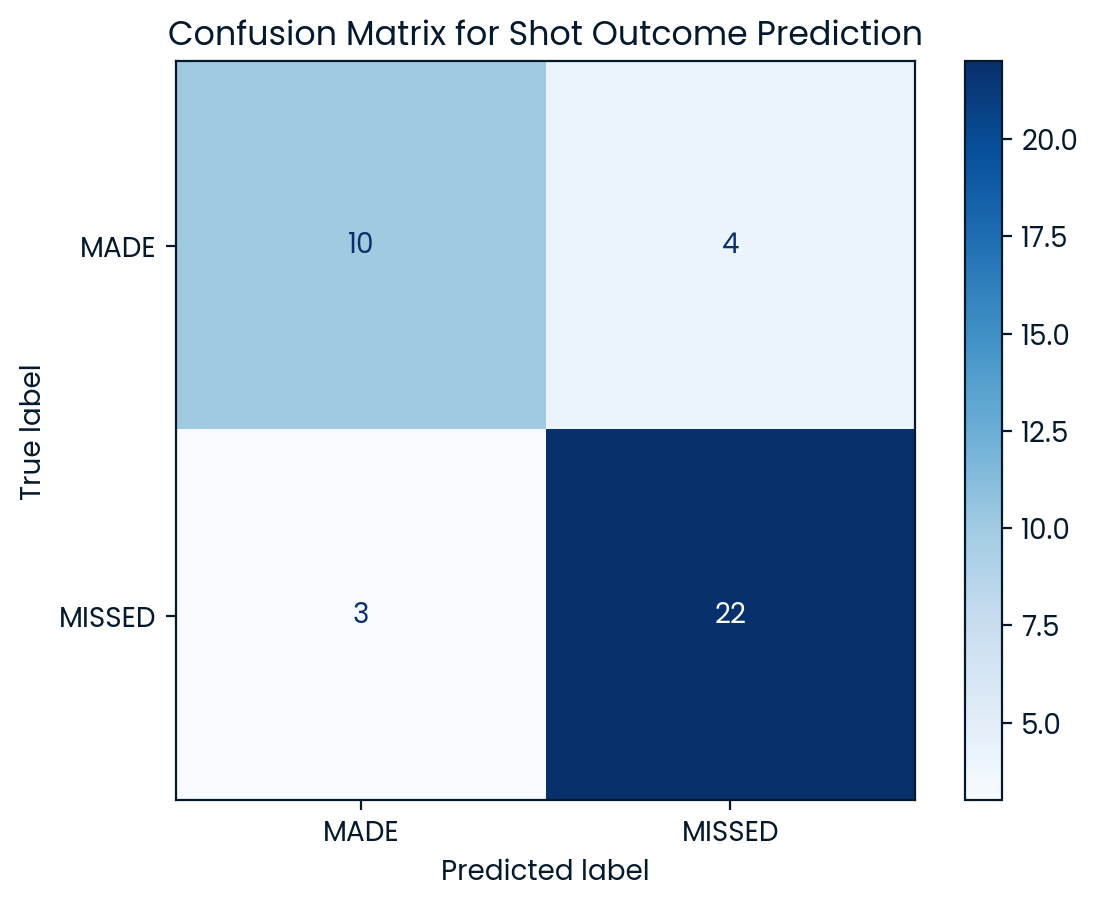

In [90]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1/0 Made/Missed
y = (df['SCORE'] == 'MADE').astype(int)

# distance from rim
df['DIST_FROM_HOOP'] = np.sqrt((df['X'])**2 + (df['Y'] - 5.25)**2)

# angle from hoop
df['ANGLE_FROM_HOOP'] = np.arctan2(df['Y'] - 5.25, df['X'])

# 3 ptrs
df['IS_3_POINTER'] = (df['DIST_FROM_HOOP'] > 23).astype(int)

# shooting percentage
df['AVG'] = df.groupby('SHOOTER')['SCORE'].transform(lambda x: (x == 'MADE').mean())

# one hot encode shooter and defender
X_categorical = df[['SHOOTER', 'DEFENDER']]
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X_categorical)

# numerical and categorical features
X_numerical = df[['DIST_FROM_HOOP', 'ANGLE_FROM_HOOP', 'IS_3_POINTER', 'AVG']].values
X = np.hstack([X_numerical, X_encoded])

# 1/0 Made/Missed
y = (df['SCORE'] == 'MADE').astype(int)

# train/test split 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# test 
test_accuracy = model.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy:.3f}")

# 5 - folds cross validation
cv_scores = cross_val_score(model, X, y, cv=20)
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.3f} ± {np.std(cv_scores):.3f}")

y_pred = model.predict(X_test)

# matrix 
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["MADE", "MISSED"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Shot Outcome Prediction")
plt.show()


Test Set Accuracy: 0.615
Cross-Validation Accuracy: 0.414 ± 0.084


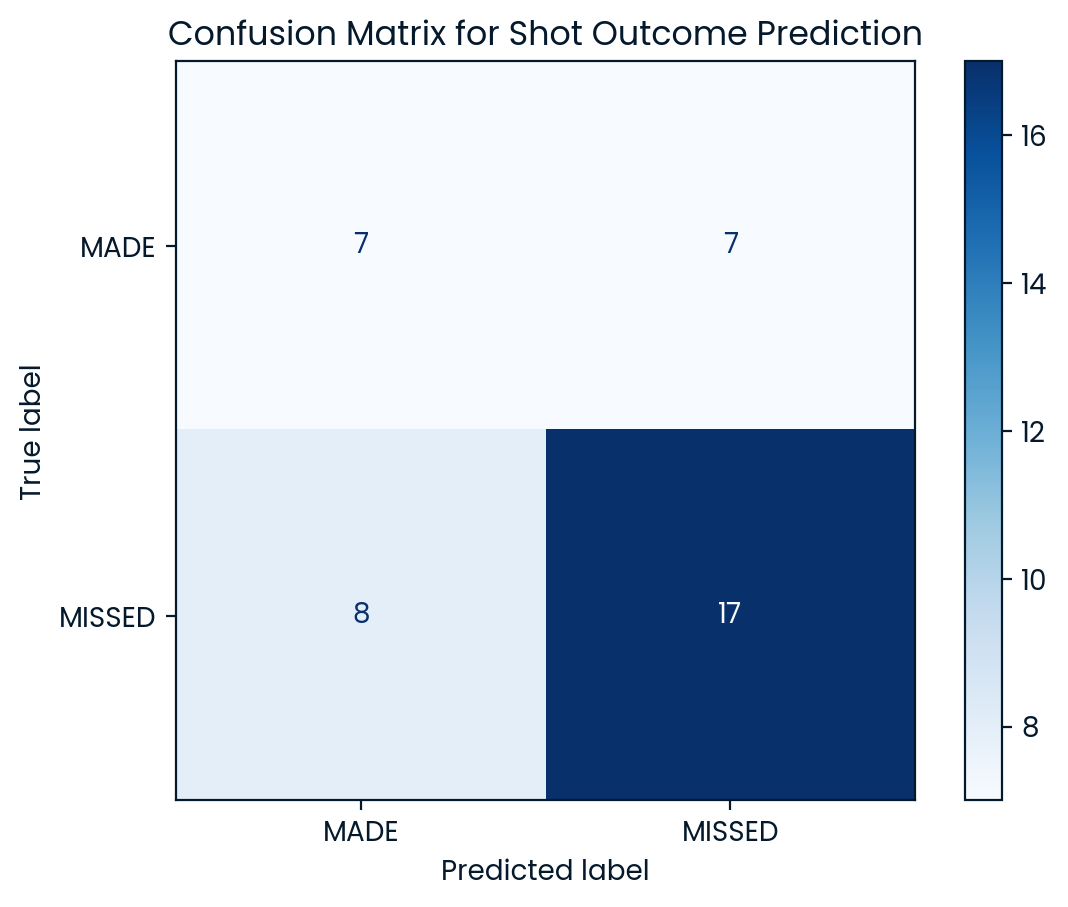

In [84]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming df is already defined and loaded with data
# 1/0 Made/Missed
y = (df['SCORE'] == 'MADE').astype(int)

# distance from rim
df['DIST_FROM_HOOP'] = np.sqrt((df['X'])**2 + (df['Y'] - 5.25)**2)

# angle from hoop
df['ANGLE_FROM_HOOP'] = np.arctan2(df['Y'] - 5.25, df['X'])

# 3 ptrs
df['IS_3_POINTER'] = (df['DIST_FROM_HOOP'] > 23).astype(int)

# shooting percentage
df['AVG'] = df.groupby('SHOOTER')['SCORE'].transform(lambda x: (x == 'MADE').mean())

# one hot encode shooter and defender
X_categorical = df[['SHOOTER', 'DEFENDER']]
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X_categorical)

# numerical and categorical features
X_numerical = df[['DIST_FROM_HOOP', 'ANGLE_FROM_HOOP', 'IS_3_POINTER', 'AVG']].values
X = np.hstack([X_numerical, X_encoded])

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Random Forest model
model = RandomForestClassifier(n_estimators=5, random_state=42)
model.fit(X_train, y_train)

# Test set performance
test_accuracy = model.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy:.3f}")

# 5-Fold Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.3f} ± {np.std(cv_scores):.3f}")

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["MADE", "MISSED"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Shot Outcome Prediction")
plt.show()

# Conclusion and Analysis of the Data

We analyzed the shooting performance of four NBA players during the 2021 playoffs using several visualizations to explore shot selection and accuarcy. 

## Shot Maps and Accuracy:
Shot maps revealed the shooting tendencies of each player and also gave us information regarding how accurate a particular player might be. We broke down the shots by marking red as missed shots and green as shots made. This helped visualize the fact that certain players were more consistent at the 3-point range than other players. For example, the colors help us realize that the accuracy of Russel Westbrook was particularly low during the 2021 Playoffs. 


## Shot Type Distribution: 

The grouped bar chart comparing the shot types gave us more information on what types of shots players relied on to perform. We were able to do a side-by-side comparison between each of the players. For example, we can see that Trae Young took significantly more 3-pointers than any other player while Chris Paul often opted to take mid-range 2-point shots. The following 2-point vs 3-point breakdown bar graph further supports the information from the grouped bar graph but makes it easier to compare shot types within a particular player's shot history. Here we can easily see that Russel Westbrook took a variety of shot without choosing any shot significantly more than the rest.  

## Defender Analysis: 

The heat map was created based on accuracy that players had against various other players. We can see that Seth Curry was highly accurate against Trae Young and that Trae Young was the weakest defender overall out of the 4 players. This gives us insight on what players might cause more or less defensive pressure. We then used this information to help define "difficult" shot selection. We defined difficult shots to be 23+ feet and taken against a high-performing defender. The bar graph that represents the number of difficult shots by each player shows that Steph Curry was able to perform under preassure as he had the most difficult shots made by a margin of 13 shots. 

## Regression Models

We aimed to ___.

pdp, ale, shapley, variable importance plots - gives us more information 